### 목표
- 10종류의 패션 이미지 데이터를 분류하는 신경망 모델 만들기
- 중간층 활성화함수와 최적화함수를 변화시켜가며 결과를 비교해보자

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [5]:
data = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
len(data)

2

In [7]:
(X_train, y_train), (X_test, y_test) = data

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


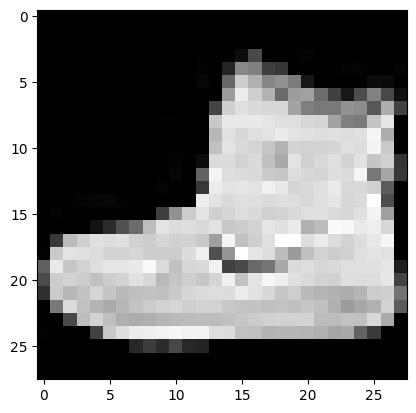

In [9]:
plt.imshow(X_train[0], cmap='gray')

In [10]:
# X_train = X_train.reshape(60000, -1)
# X_test = X_test.reshape(10000, -1)

In [11]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [12]:
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [14]:
y_train_onehot.shape, y_test_onehot.shape

((60000, 10), (10000, 10))

### 활성화함수, 최적화함수 별 비교
- 1. 중간층 활성화함수 : sigmoid, 최적화함수 : SGD
- 2. 중간층 활성화함수 : relu, 최적화함수 : SGD
- 3. 중간층 활성화함수 : relu, 최적화함수 : Adam
  - 각각의 신경망 설계 후 결과 비교

In [13]:
# 1 sigmoid / SGD
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                3

In [15]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='SGD',
              metrics=['acc'])

In [16]:
h = model.fit(X_train, y_train_onehot, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 13s 5ms/step - loss: 2.3069 - acc: 0.1130 - val_loss: 2.2994 - val_acc: 0.1003
Epoch 2/30
1500/1500 [==============================] - 8s 6ms/step - loss: 2.2969 - acc: 0.1253 - val_loss: 2.2947 - val_acc: 0.1005
Epoch 3/30
1500/1500 [==============================] - 10s 6ms/step - loss: 2.2909 - acc: 0.1651 - val_loss: 2.2856 - val_acc: 0.2702
Epoch 4/30
1500/1500 [==============================] - 10s 7ms/step - loss: 2.2760 - acc: 0.2108 - val_loss: 2.2608 - val_acc: 0.2009
Epoch 5/30
1500/1500 [==============================] - 7s 5ms/step - loss: 2.2026 - acc: 0.2700 - val_loss: 2.0849 - val_acc: 0.2007
Epoch 6/30
1500/1500 [==============================] - 10s 6ms/step - loss: 1.8782 - acc: 0.2650 - val_loss: 1.7383 - val_acc: 0.3481
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 1.6904 - acc: 0.3406 - val_loss: 1.6545 - val_acc: 0.4545
Epoch 8/30
1500/1500 [==============================] - 8s

In [29]:
model.evaluate(X_test, y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: 0.8063 - acc: 0.6950


[0.8062844276428223, 0.6949999928474426]

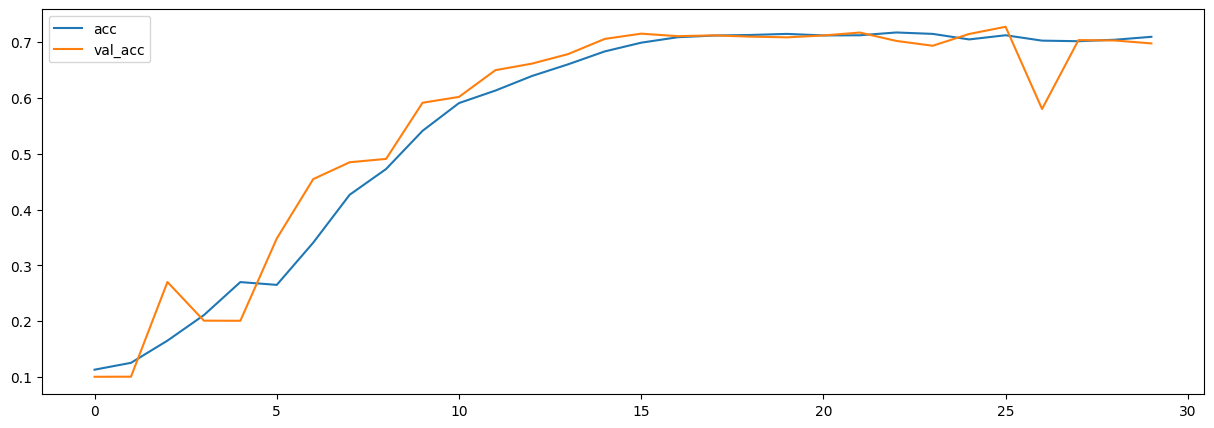

In [17]:
plt.figure(figsize=(15, 5))

plt.plot(h.history['acc'], label='acc')
plt.plot(h.history['val_acc'], label='val_acc')

plt.legend()
plt.show()

In [35]:
# SGD의 학습률을 줄여서 좀 더 안정적이고 정확하게 학습시켜보자
from tensorflow.keras.optimizers import SGD

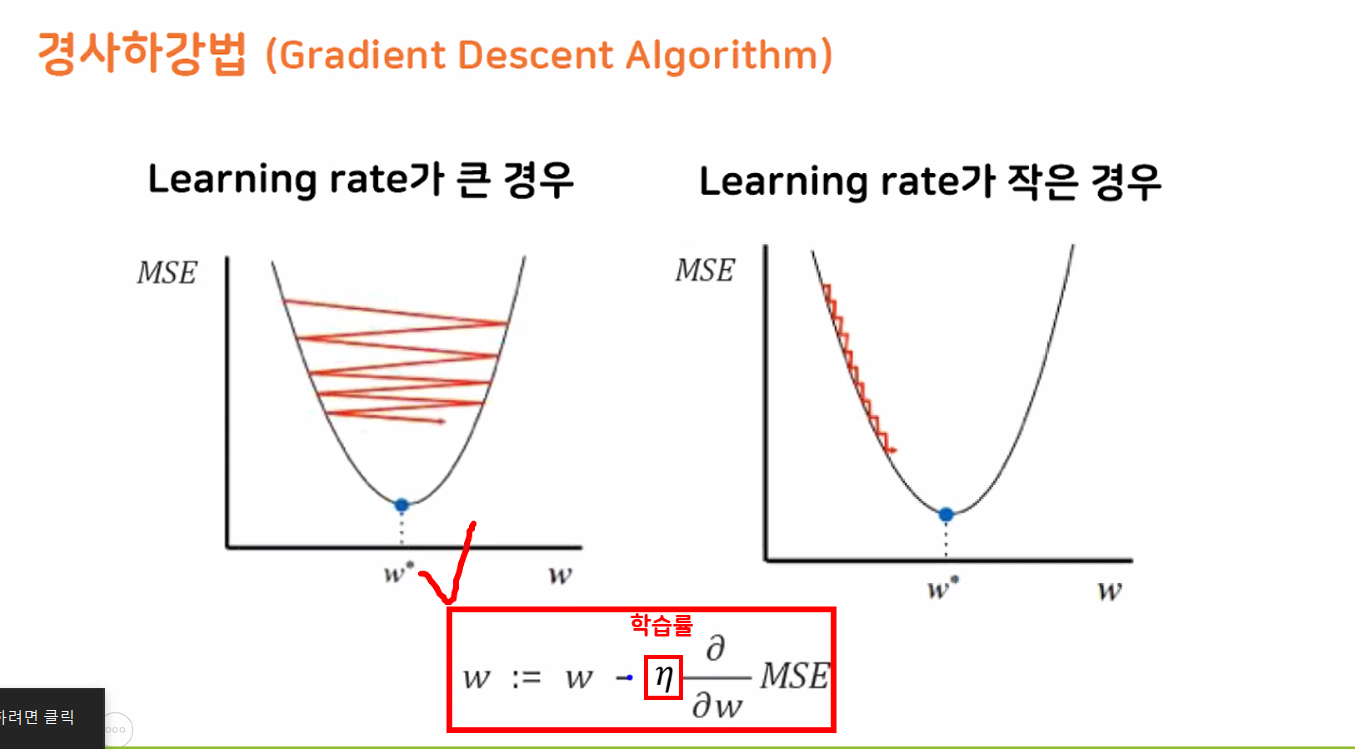

In [36]:
# 2 relu / SGD
model1 = Sequential()

model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))

model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 10)               

In [37]:
model1.compile(loss = 'categorical_crossentropy',
          optimizer=SGD(learning_rate=0.001), # SGD 디폴트값 : 0.01
              metrics=['acc'])

In [38]:
h1 = model1.fit(X_train, y_train_onehot, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 7s 4ms/step - loss: 1.0025 - acc: 0.7504 - val_loss: 0.5306 - val_acc: 0.8141
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4844 - acc: 0.8272 - val_loss: 0.4837 - val_acc: 0.8312
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4274 - acc: 0.8459 - val_loss: 0.4589 - val_acc: 0.8424
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3924 - acc: 0.8568 - val_loss: 0.4310 - val_acc: 0.8484
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3646 - acc: 0.8663 - val_loss: 0.4282 - val_acc: 0.8503
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3450 - acc: 0.8725 - val_loss: 0.4217 - val_acc: 0.8533
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3290 - acc: 0.8791 - val_loss: 0.4197 - val_acc: 0.8536
Epoch 8/30
1500/1500 [==============================] - 6s 4ms

In [30]:
model1.evaluate(X_test, y_test_onehot)

313/313 [==============================] - 1s 3ms/step - loss: nan - acc: 0.1000


[nan, 0.10000000149011612]

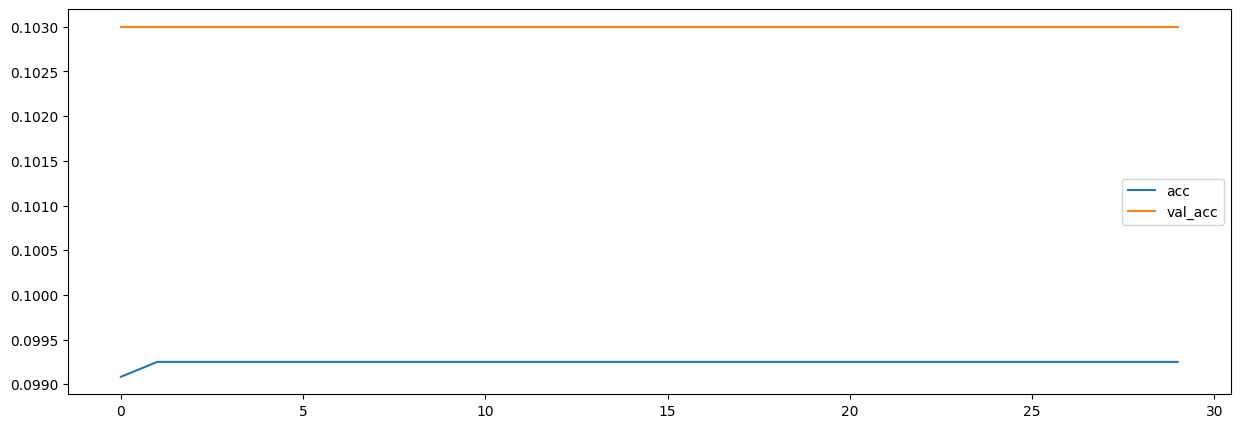

In [32]:
plt.figure(figsize=(15, 5))

plt.plot(h1.history['acc'], label='acc')
plt.plot(h1.history['val_acc'], label='val_acc')

plt.legend()
plt.show()

In [22]:
# 3 relu / Adam
model2 = Sequential()

model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))

model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 10)               

In [23]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [24]:
h2 = model2.fit(X_train, y_train_onehot, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 9s 5ms/step - loss: 1.1235 - acc: 0.7740 - val_loss: 0.4692 - val_acc: 0.8313
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4646 - acc: 0.8334 - val_loss: 0.4367 - val_acc: 0.8447
Epoch 3/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4240 - acc: 0.8478 - val_loss: 0.4135 - val_acc: 0.8503
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3968 - acc: 0.8580 - val_loss: 0.4098 - val_acc: 0.8521
Epoch 5/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3737 - acc: 0.8661 - val_loss: 0.4093 - val_acc: 0.8581
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3620 - acc: 0.8708 - val_loss: 0.3624 - val_acc: 0.8711
Epoch 7/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3493 - acc: 0.8747 - val_loss: 0.3742 - val_acc: 0.8664
Epoch 8/30
1500/1500 [==============================] - 6s 4ms

In [31]:
model2.evaluate(X_test, y_test_onehot)

313/313 [==============================] - 1s 4ms/step - loss: 0.4588 - acc: 0.8778


[0.4587962031364441, 0.8777999877929688]

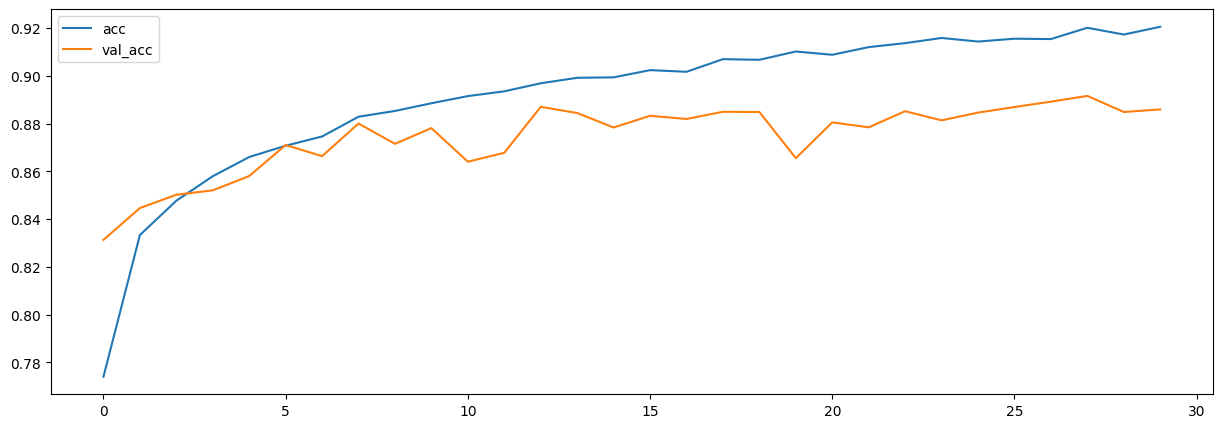

In [25]:
plt.figure(figsize=(15, 5))

plt.plot(h2.history['acc'], label='acc')
plt.plot(h2.history['val_acc'], label='val_acc')

plt.legend()
plt.show()

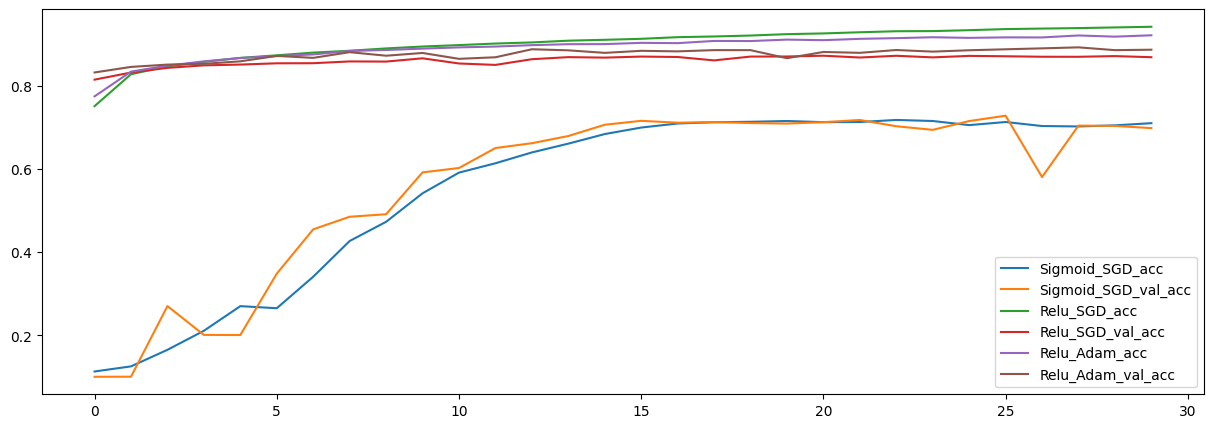

In [39]:
plt.figure(figsize=(15, 5))

plt.plot(h.history['acc'], label='Sigmoid_SGD_acc')
plt.plot(h.history['val_acc'], label='Sigmoid_SGD_val_acc')
plt.plot(h1.history['acc'], label='Relu_SGD_acc')
plt.plot(h1.history['val_acc'], label='Relu_SGD_val_acc')
plt.plot(h2.history['acc'], label='Relu_Adam_acc')
plt.plot(h2.history['val_acc'], label='Relu_Adam_val_acc')

plt.legend()
plt.show()

### 최적화 모델 찾기
- 모델체크포인트 : 모델 저장
- 얼리스탑핑 : 조기학습중단

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [43]:
# 1. 모델 저장
# 저장 경로 및 파일명 형태 설정
save_path = '/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터비즈니스 과정/model/FashionModel_{epoch:03d}_{val_acc:.4f}.hdf5'
# d : 10진수 형태, 03 -> 0이 3개 붙어있는 형태의 자리수(001, 002, 003 ...)
# f : 소수점 형태, .4 -> 소수점 4자리까지 형태의 자리수(0.0001, 0.0002 ...)
# hdf5 : 저장되는 모델 파일의 확장자명

f_mckp = ModelCheckpoint(filepath = save_path,  # 파일 경로 설정
                         monitor = 'val_acc',   # 해당 값을 기준으로 파일을 저장
                         save_best_only = True, # Monitor값이 최고점 혹은 최고점 갱신햇을 경우 모델을 저장
                         mode = 'max',          # save_best_only가 True일 경우 갱신 값의 최대, 최소를 결정
                         verbose = 1            # 모델 개선 및 저장 메시지를 출력
                         )

In [44]:
# 2. 학습 조기 중단
f_early = EarlyStopping(monitor = 'val_acc',
                        patience = 5, # monitor의 값 개선을 몇 번이나 기다려줄지 결정
                        )



In [45]:
# 3 relu / Adam
model3 = Sequential()

model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))

model3.add(Dense(10, activation='softmax'))
model3.summary()

model3.compile(loss = 'categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

h3 = model3.fit(X_train, y_train_onehot,
                epochs=30,
                batch_size=32,
                validation_split=0.2,
                callbacks = [f_mckp, f_early])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 512)               401920    
                                                                 
 dense_31 (Dense)            (None, 256)               131328    
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 10)               

- 저장된 모델 로드하기

In [46]:
from tensorflow.keras.models import load_model

In [47]:
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터비즈니스 과정/model/FashionModel_009_0.8788.hdf5')

In [49]:
best_model.evaluate(X_test, y_test_onehot)

313/313 [==============================] - 2s 5ms/step - loss: 0.3802 - acc: 0.8704


[0.38019710779190063, 0.8704000115394592]